# COMP4211 Programming Assignment 1

**Name: FONG, Ho Yin**  
**SID: 20599045**

### Part 1: Data Preprocessing
In this part, you are required to preprocess the data and visualize the basic properties of the dataset.  
To be specific, you need to remove the duplicates and fill in the missing values with the median value.  
After you have finished handling the above cases, visualize the correlation between every two of the 10 features with a heatmap.  
**[Q1]** Report the number of remaining records after duplicate removal and paste the screenshot of the heatmap.

(1617, 11)


<AxesSubplot:>

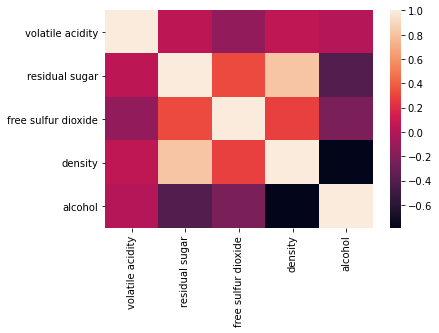

In [1]:
import pandas as pd
import seaborn as sns

df_train = pd.read_csv("./train.csv", sep = ",")
df_train = df_train.drop_duplicates()
df_train = df_train.fillna(df_train.median())
print(df_train.shape)

df_corr = df_train.iloc[:,1::2].corr()
sns.heatmap(df_corr)

### Part 2: Regression
Linear regression is a basic model for regression which is expressed in the form f(x; w) = w0 + w1x1 + . . . + wdxd, where w denotes the parameters to be learned from the data.   Note that this basic model has no hyperparameters to set.  
  
In this task, you will build six linear regression models in the first step, where each model uses one feature to find whether it is correlated with the feature ‘density’. The six features are ‘fixed acidity’, ‘residual sugar’, ‘chlorides’, ‘free sulfur dioxide’, ‘total sulfur dioxide’, and ‘alcohol’. Then, in the second step, you will build another linear regression model that explores the relationship between the linear combination of the six features and the feature density’.  
  
You are required to use the train test split submodule in scikit-learn to split the data in train.csv, with 80% for training and 20% for validation. You should set random state = 4211 for reproducibility.  
  
**[Q2]** Report the validation R2 score of each model to evaluate the relationship between different features and ‘density’.  

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sklearn


features = ['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','alcohol']

X = df_train[features].values.reshape(-1,6)
y = df_train['density'].values.reshape(-1,1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 4211)

models = []

for i, feature in zip(range(len(features)), features):
    model = LinearRegression()
    model.fit(X_train[:,i].reshape(-1, 1), y_train)
    y_pred = model.predict(X_val[:,i].reshape(-1, 1))
    print('R^2 score of %s model: %.4f' % (feature,r2_score(y_val, y_pred)))
    models.append(model)
    
model= LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print('R^2 score of model for all 6 features: %.4f' % r2_score(y_val, y_pred))

R^2 score of fixed acidity model: 0.0612
R^2 score of residual sugar model: 0.6657
R^2 score of chlorides model: 0.0829
R^2 score of free sulfur dioxide model: 0.0978
R^2 score of total sulfur dioxide model: 0.3058
R^2 score of alcohol model: 0.6243
R^2 score of model for all 6 features: 0.9358


**[Q3]** After training the models with the training set, use them to make prediction on the validation set. Then, plot the regression line and the data points of the validation set for each of the first six models. For illustration, the figure below shows a plot of the feature ‘density’ versus the feature ‘total sulfur dioxide’ and the regression line.

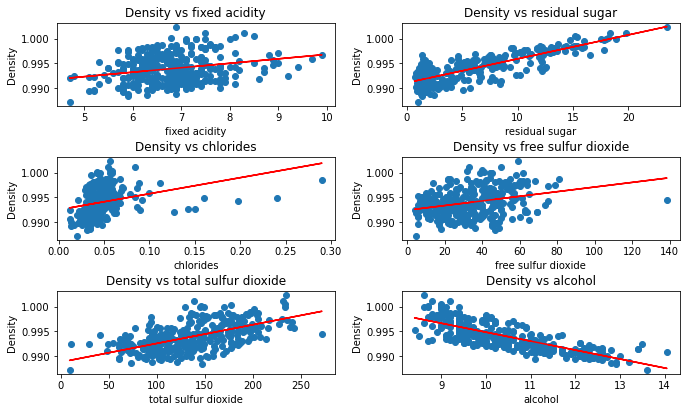

In [3]:
fig, ax = plt.subplots(3, 2,figsize=(10,6))
fig.tight_layout(pad = 3.0)

for i, model, feature in zip(range(len(models)), models, features):
    y_pred = model.predict(X_val[:,i].reshape(-1, 1))
    ax[(int)(i/2),i%2].scatter(X_val[:,i], y_val)
    ax[(int)(i/2),i%2].plot(X_val[:,i], y_pred, color='red')
    ax[(int)(i/2),i%2].set_title('Density vs %s' % feature)  
    ax[(int)(i/2),i%2].set_ylabel('Density')
    ax[(int)(i/2),i%2].set_xlabel(feature)              

plt.show()

### Part 3: Classification
In this task, you will build a logistic regression model as well as neural network classifiers to predict whether a certain type of wine is of high quality or not. You have to select the features according to some statistics and then use the selected features to complete the classification task.  
  
You are also required to use the train test split submodule in scikit-learn to split the data, with 80% for training and 20% for validation. As before, we ask that you set random state = 4211 for reproducibility.

#### Feature Selection
To reduce the computational cost and remove the unrelated features, we would like to choose a subset of features for classification. You can use the feature selection module in scikit-learn. Select chi-squared statistics as the score for feature selection and then drop the two least important features.  
  
**[Q4]** Report the score for each of the 10 features.

In [4]:
from sklearn.feature_selection import SelectKBest, chi2

X = df_train.drop(columns=['label'])
y = df_train['label']

chi2_, pval = chi2(X,y.astype('int'))

selector = SelectKBest(chi2, k=8)
selector.fit(X, y)
selected_cols = selector.get_support(indices=True)
X_selected = X.iloc[:,selected_cols]

for i, cols in zip(range(len(chi2_)),X.columns):
    print("Chi-sqaure score of the \"%s\" feature: %0.4f" % (cols, chi2_[i]))

Chi-sqaure score of the "fixed acidity" feature: 3.6850
Chi-sqaure score of the "volatile acidity" feature: 2.7365
Chi-sqaure score of the "citric acid" feature: 0.0342
Chi-sqaure score of the "residual sugar" feature: 250.1380
Chi-sqaure score of the "chlorides" feature: 1.5543
Chi-sqaure score of the "free sulfur dioxide" feature: 0.3349
Chi-sqaure score of the "total sulfur dioxide" feature: 1573.1850
Chi-sqaure score of the "density" feature: 0.0029
Chi-sqaure score of the "pH" feature: 0.3467
Chi-sqaure score of the "alcohol" feature: 84.7664


#### Logistic Regression
Learning of the logistic regression model should use a gradient-descent algorithm by minimizing the cross-entropy loss. It requires that the step size parameter η be specified. Try out a few values (<1) and choose one that leads to stable convergence. You may also decrease η gradually during the learning process to enhance convergence. This can be done automatically in scikit-learn when set properly.  
  
Use the features selected in Section 6.1 above to train the model. During training, record the training time for the logistic regression model. After training, you are required to evaluate your model using accuracy, the F1 score1 and the ROC curve on the validation set. Remember to standardize the features before training and validation.  
  
**[Q5]** Report the model setting, training time, and performance of the logistic regression model. Since the solution found may depend on the initial weight values, you are expected to repeat each setting three times and report the corresponding mean and standard deviation of the training time, accuracy, and F1 score for each setting.

Reporting the models with [Alpha = 0.0001]
Model 1:
Training time: 0.0100
Training Accuracy: 0.8329
Validation Accuracy: 0.8333
F1 score: 0.7353
Model 2:
Training time: 0.0140
Training Accuracy: 0.8105
Validation Accuracy: 0.8179
F1 score: 0.6811
Model 3:
Training time: 0.0100
Training Accuracy: 0.8399
Validation Accuracy: 0.8302
F1 score: 0.7343


Mean of Training time:		 0.0113
S.D. of Training time:		 0.0019
Mean of Training Accuracy:	 0.8278
S.D. of Training Accuracy:	 0.0125
Mean of Validation Accuracy:	 0.8272
S.D. of Validation Accuracy:	 0.0067
Mean of F1 score:		 0.7169
S.D. of F1 score:		 0.0253


Reporting the models with [Alpha = 0.001]
Model 1:
Training time: 0.0040
Training Accuracy: 0.8299
Validation Accuracy: 0.8210
F1 score: 0.6813
Model 2:
Training time: 0.0100
Training Accuracy: 0.8399
Validation Accuracy: 0.8426
F1 score: 0.7463
Model 3:
Training time: 0.0060
Training Accuracy: 0.8438
Validation Accuracy: 0.8488
F1 score: 0.7538


Mean of Training time:		 0.0066
S.D

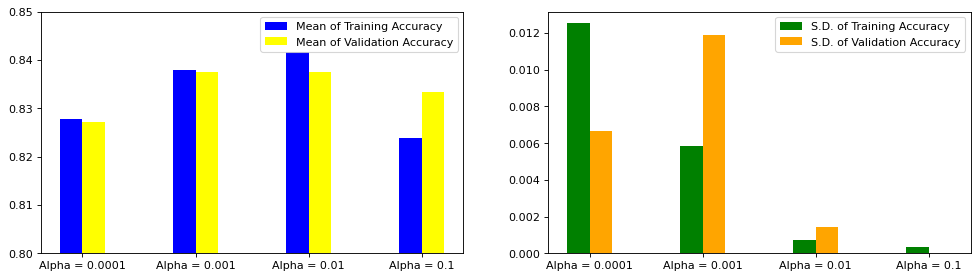

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import time

X_selected = StandardScaler().fit_transform(X_selected)
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size = 0.2, random_state = 4211)

params = [{'loss': 'log', 'penalty': 'l2', 'learning_rate': 'optimal', 'alpha': 0.0001},
          {'loss': 'log', 'penalty': 'l2', 'learning_rate': 'optimal', 'alpha': 0.001},
          {'loss': 'log', 'penalty': 'l2', 'learning_rate': 'optimal', 'alpha': 0.01},
          {'loss': 'log', 'penalty': 'l2', 'learning_rate': 'optimal', 'alpha': 0.1}]

labels = ["Alpha = 0.0001",
          "Alpha = 0.001",
          "Alpha = 0.01",
          "Alpha = 0.1"]

meanTrainAccList, meanValAccList, sdTrainAccList, sdValAccList = [], [], [], []

for label, param in zip(labels, params):
    model1 = SGDClassifier(**param, random_state = 1)
    model2 = SGDClassifier(**param, random_state = 2)
    model3 = SGDClassifier(**param, random_state = 4211)
    models = [model1, model2, model3]
    timeList, trainAccList, valAccList, scoreList = [], [], [], []
    
    print("Reporting the models with [%s]" % label)
    i=1
    
    for model in models:
        start = time.time()
        model.fit(X_train,y_train)
        trainingTime = time.time() - start
        timeList.append(trainingTime)
        
        trainAcc = model.score(X_train,y_train)
        valAcc = model.score(X_val,y_val)
        trainAccList.append(trainAcc)
        valAccList.append(valAcc)
        
        y_pred = model.predict(X_val)
        score = sklearn.metrics.f1_score(y_val,y_pred)
        scoreList.append(score)
        
        print("Model %d:" % i)
        print("Training time: %.4f" % trainingTime)
        print("Training Accuracy: %.4f" % trainAcc)
        print("Validation Accuracy: %.4f" % valAcc)
        print("F1 score: %.4f" % score)
        
        i = i+1

    print("\n\nMean of Training time:\t\t %.4f" % np.mean(timeList))
    print("S.D. of Training time:\t\t %.4f" % np.std(timeList))
    print("Mean of Training Accuracy:\t %.4f" % np.mean(trainAccList))
    print("S.D. of Training Accuracy:\t %.4f" % np.std(trainAccList))
    print("Mean of Validation Accuracy:\t %.4f" % np.mean(valAccList))
    print("S.D. of Validation Accuracy:\t %.4f" % np.std(valAccList))
    print("Mean of F1 score:\t\t %.4f" % np.mean(scoreList))
    print("S.D. of F1 score:\t\t %.4f\n\n" % np.std(scoreList))
    
    meanTrainAccList.append(np.mean(trainAccList))
    sdTrainAccList.append(np.std(trainAccList))
    meanValAccList.append(np.mean(valAccList))
    sdValAccList.append(np.std(valAccList))
    
plt.figure(num=1, figsize=(15, 4), dpi=80)

plt.subplot(121)
plt.bar(range(len(meanTrainAccList)), meanTrainAccList,  width = 0.2, color='blue', label = 'Mean of Training Accuracy')
plt.bar([x + 0.2 for x in range(len(meanValAccList))], meanValAccList, width = 0.2, color='yellow', label = 'Mean of Validation Accuracy')
plt.ylim([0.8,0.85])
plt.xticks([x + 0.1 for x in range(len(labels))],labels)
plt.legend()

plt.subplot(122)
plt.bar(range(len(sdTrainAccList)), sdTrainAccList, width = 0.2, color='green', label = 'S.D. of Training Accuracy')
plt.bar([x + 0.2 for x in range(len(meanValAccList))], sdValAccList, width = 0.2, color='orange', label = 'S.D. of Validation Accuracy')
plt.xticks([x + 0.1 for x in range(len(labels))],labels)
plt.legend()
plt.show()

**[Q6]** Plot the ROC curve calculated on the validation set with the last model in [Q5] and report the AUC value. Give one advantage of the ROC curve for model evaluation.

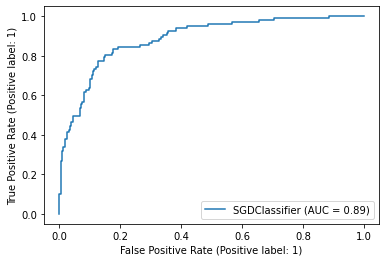

In [6]:
from sklearn.metrics import plot_roc_curve,auc

model =  SGDClassifier(loss = 'log', penalty = 'l2', learning_rate = 'optimal', alpha = 0.01, random_state = 4211)
model.fit(X_train,y_train)

plot_roc_curve(model, X_val , y_val)
plt.show()

#### Single-hidden-layer Neural Networks
Neural network classifiers generalize logistic regression by introducing one or more hidden layers. The learning algorithm for them is similar to that for logistic regression as described above. Remember to standardize the features before training and validation.  
  
For the single-hidden-layer neural network model, you need to try different number of hidden units H ∈ {1, 2, 4, 8, 16, 32, 64, 128}. The hyperparameter max iter can be set to 500 (default is 200) and early stopping can be set to ‘True’ to avoid overfitting (default is ‘False’). The other hyperparameters may just take their default values. During training, you are expected to record the training time of the models. After training, evaluate your models using the accuracy and the F1 score on the validation set. You have to report the accuracy and the F1 score for each value of H by plotting them using matplotlib.  
  
**[Q7]** Report the model setting, training time, and performance of the neural networks for each value of H. You are also expected to repeat each setting three times for the same hyperparameter setting and report the mean and standard deviation of the training time, accuracy, and F1 score for each setting.  
  
**[Q8]** Compare the training time, accuracy and F1 score of the logistic regression model and the best neural network model.  

In [7]:
from sklearn.neural_network import MLPClassifier

H = [1,2,4,8,16,32,64,128]
meanAccList, meanScoreList, sdAccList, sdScoreList = [], [], [], []

for i in H:
    clf1 = MLPClassifier(hidden_layer_sizes=(i, ), solver='sgd', max_iter=500, early_stopping=True, random_state = 1)
    clf2 = MLPClassifier(hidden_layer_sizes=(i, ), solver='sgd', max_iter=500, early_stopping=True, random_state = 2)
    clf3 = MLPClassifier(hidden_layer_sizes=(i, ), solver='sgd', max_iter=500, early_stopping=True, random_state = 4211)
    clfs = [clf1, clf2, clf3]
    
    timeList, accList, scoreList = [], [], []
    print("Statistics of models with %d hidden unit(s)" % i)
    j=1
    
    for clf in clfs:
        start = time.time()
        clf.fit(X_train, y_train)
        trainingTime = time.time() - start
        timeList.append(trainingTime)
        
        acc = clf.score(X_val, y_val)
        accList.append(acc)
        
        y_pred = clf.predict(X_val)
        score = sklearn.metrics.f1_score(y_val,y_pred)
        scoreList.append(score)
        
        print("Iteration %d:" %j)
        print("Training time: %.4f" % trainingTime)
        print("Accuracy: %.4f" % acc)
        print("F1 score: %.4f\n" % score)
        
        j=j+1
    
    meanTime = np.mean(timeList)
    sdTime = np.std(timeList)
    meanAcc = np.mean(accList)
    sdAcc = np.std(accList)
    meanScore = np.mean(scoreList)
    sdScore = np.std(scoreList)
    
    print("Mean of Training time:\t %.4f" % meanTime)
    print("S.D. of Training time:\t %.4f" % sdTime)
    print("Mean of Accuracy:\t %.4f" % meanAcc)
    print("S.D. of Accuracy:\t %.4f" % sdAcc)
    print("Mean of F1 score:\t %.4f" % meanScore)
    print("S.D. of F1 score:\t %.4f\n\n" % sdScore)
    
    meanAccList.append(meanAcc)
    meanScoreList.append(meanScore)
    sdAccList.append(sdAcc)
    sdScoreList.append(sdScore)


Statistics of models with 1 hidden unit(s)
Iteration 1:
Training time: 0.1083
Accuracy: 0.6944
F1 score: 0.0000

Iteration 2:
Training time: 0.0489
Accuracy: 0.3148
F1 score: 0.3867

Iteration 3:
Training time: 0.0608
Accuracy: 0.7006
F1 score: 0.0000

Mean of Training time:	 0.0727
S.D. of Training time:	 0.0257
Mean of Accuracy:	 0.5700
S.D. of Accuracy:	 0.1804
Mean of F1 score:	 0.1289
S.D. of F1 score:	 0.1823


Statistics of models with 2 hidden unit(s)
Iteration 1:
Training time: 0.3571
Accuracy: 0.7191
F1 score: 0.5333

Iteration 2:
Training time: 0.3386
Accuracy: 0.7870
F1 score: 0.6102

Iteration 3:
Training time: 0.0529
Accuracy: 0.2994
F1 score: 0.4608

Mean of Training time:	 0.2495
S.D. of Training time:	 0.1393
Mean of Accuracy:	 0.6019
S.D. of Accuracy:	 0.2157
Mean of F1 score:	 0.5348
S.D. of F1 score:	 0.0610


Statistics of models with 4 hidden unit(s)
Iteration 1:
Training time: 0.4777
Accuracy: 0.7654
F1 score: 0.6275

Iteration 2:
Training time: 0.2074
Accuracy: 

**[Q9]** Plot the accuracy and the F1 score for different values of H. Suggest a possible reason for the gap between the accuracy and the F1 score. 
  
**[Q10]** Do you notice any trend when you increase the hidden layer size from 1 to 128? If so, please describe what the trend is and suggest a reason for your observation.

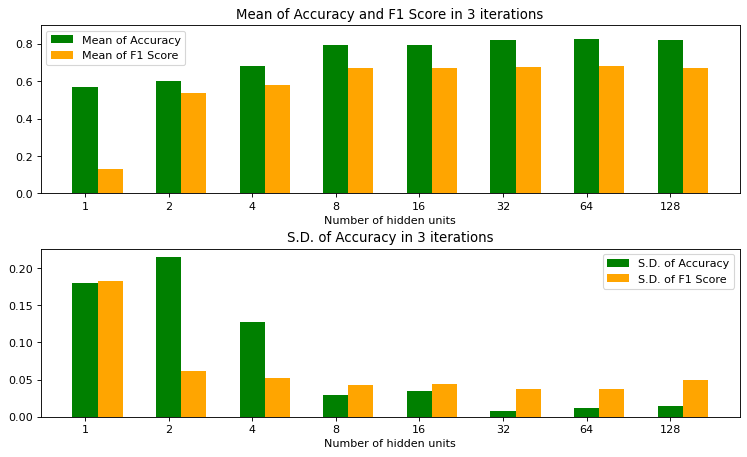

In [8]:
fig, ax = plt.subplots(2, 1,figsize=(10,6), dpi = 80)
fig.tight_layout(pad = 3.0)

ax[0].bar(range(len(meanAccList)), meanAccList,  width = 0.3, color='green', label='Mean of Accuracy')
ax[0].bar([x + 0.3 for x in range(len(meanScoreList))], meanScoreList,  width = 0.3, color='orange', label='Mean of F1 Score')
ax[0].set_ylim([0,0.9])
ax[0].set_xticks(list(range(len(H))))
ax[0].set_xticklabels(H)
ax[0].set_title("Mean of Accuracy and F1 Score in 3 iterations")
ax[0].set_xlabel("Number of hidden units")

ax[1].bar(range(len(sdAccList)), sdAccList, width = 0.3, color='green', label='S.D. of Accuracy')
ax[1].bar([x + 0.3 for x in range(len(sdScoreList))], sdScoreList,  width = 0.3, color='orange', label='S.D. of F1 Score')
ax[1].set_xticks(list(range(len(H))))
ax[1].set_xticklabels(H)
ax[1].set_title("S.D. of Accuracy in 3 iterations")
ax[1].set_xlabel("Number of hidden units")

ax[0].legend()
ax[1].legend()
plt.show()

### Part 4: Performance Enhancement
#### Hyperparameter Tuning
In this task, you need to use grid search to tune a single-hidden-layer neural network model to predict whether a type of wine is of high quality or not. Use the features selected in Section 6.1 for training and testing.  
  
This time, you are required to evaluate your model on the test set test.csv provided. You need to import test.csv as a data frame and standardize the features using the statistics you used for the training data. Remember to standardize the features in the training set as well. (We assume that the test set comes from the same distribution as the training set.)  
  
You are required to use the model selection submodule in scikit-learn to facilitate performing grid search cross validation for hyperparameter tuning. This is done by randomly sampling 80% of the training instances to train a classifier and then validating it on the remaining 20%. Five such random data splits are performed and the average over these five trials is used to estimate the generalization performance. You are expected to search at least 10 combinations of the hyperparameter setting. Set the random state hyperparameter of the single-hidden-layer neural network to 4211 for reproducibility and early stopping to ‘True’ to avoid overfitting.  
  
**[Q11]** Report 10 combinations of the hyperparameter setting.

In [9]:
# from sklearn.utils.fixes import loguniform
from sklearn.model_selection import GridSearchCV

X_test = pd.read_csv("./test.csv", sep = ",")
y_test = X_test['label']
X_test = X_test.iloc[:,selected_cols]
X_test = StandardScaler().fit_transform(X_test)

param_grid = {
    'hidden_layer_sizes': [(32,),(64,),(128,)],
    'learning_rate': ['constant', 'invscaling'],
    'learning_rate_init': [0.001,0.002,0.003,0.004],
    'activation': ['relu'],
    'solver': ['sgd']
}

mlp = MLPClassifier(early_stopping=True, random_state=4211)

grid_search = GridSearchCV(mlp, param_grid, cv=5, verbose=3)
grid_search.fit(X_selected,y)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END activation=relu, hidden_layer_sizes=(32,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(32,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.3s
[CV 3/5] END activation=relu, hidden_layer_sizes=(32,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=(32,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(32,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(32,), learning_rate=constant, learning_rate_init=0.002, solver=sgd; total time=   0.3s
[CV 2/5] END activation=relu, hidden_layer_sizes=(32,), learning_rate=constant, learning_rate_init=0.002, solver=sgd

GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, random_state=4211),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(32,), (64,), (128,)],
                         'learning_rate': ['constant', 'invscaling'],
                         'learning_rate_init': [0.001, 0.002, 0.003, 0.004],
                         'solver': ['sgd']},
             verbose=3)

**[Q12]** Report the three best hyperparameter settings in terms of accuracy as well as the mean and standard deviation of the validation accuracy of the five random data splits for each hyperparameter setting.  
  


In [10]:
for i in range(1, 4):
    candidates = np.flatnonzero(grid_search.cv_results_['rank_test_score'] == i)
    for candidate in candidates:
        print("Model with rank: %d" % i)
        print("Mean validation accuracy: %0.3f (std: %0.3f})" % (grid_search.cv_results_['mean_test_score'][candidate], grid_search.cv_results_['std_test_score'][candidate]))
        print("Parameters: %s" % (grid_search.cv_results_['params'][candidate]))
        print("")

Model with rank: 1
Mean validation accuracy: 0.827 (std: 0.036})
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (128,), 'learning_rate': 'constant', 'learning_rate_init': 0.004, 'solver': 'sgd'}

Model with rank: 2
Mean validation accuracy: 0.827 (std: 0.028})
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'learning_rate_init': 0.004, 'solver': 'sgd'}

Model with rank: 3
Mean validation accuracy: 0.826 (std: 0.037})
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (128,), 'learning_rate': 'constant', 'learning_rate_init': 0.003, 'solver': 'sgd'}



**[Q13]** Use the best model in terms of accuracy to predict the instances in the test set (test.csv). Report the accuracy, F1 score and the confusion matrix of the predictions on the test set.

Accuracy: 0.8525
F1 Score: 0.7774


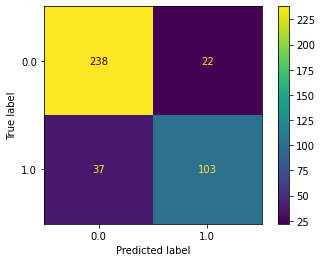

In [11]:
from sklearn.metrics import plot_confusion_matrix


acc = grid_search.score(X_test, y_test)
y_pred = grid_search.predict(X_test)
score = sklearn.metrics.f1_score(y_test,y_pred)

print("Accuracy: %0.4f" % acc)
print("F1 Score: %0.4f" % score)
plot_confusion_matrix(grid_search, X_test, y_test)

#### Oversampling
By counting the number of records in the high-quality and low-quality classes, you will notice that the training set is imbalanced with more low-quality examples than high-quality ones. In this task, you will apply the oversampling strategy to tackle this problem. To be specific, you have to randomly oversample from the minority class and add these examples to the training set so that the two classes will become balanced in size. Set the random state hyperparameter of the single hidden-layer neural network and oversampling to 4211 for reproducibility and early stopping to ‘True’ to avoid overfitting.  
  
Based on the resampled dataset, perform grid search again with the same hyperparameter settings used in Section 7.1. Remember to standardize the features.  
  
**[Q14]** Name another two methods to deal with the imbalanced dataset problem.  
  
**[Q15]** Use the best model in terms of accuracy to predict the instances in the test set (test.csv). Report the accuracy, F1 score and the confusion matrix of the predictions on the test set.  
  
**[Q16]** Compare the accuracy, F1 score and the confusion matrix with those in Section 7.1. 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END activation=relu, hidden_layer_sizes=(32,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.3s
[CV 2/5] END activation=relu, hidden_layer_sizes=(32,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.5s
[CV 3/5] END activation=relu, hidden_layer_sizes=(32,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.7s
[CV 4/5] END activation=relu, hidden_layer_sizes=(32,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.7s
[CV 5/5] END activation=relu, hidden_layer_sizes=(32,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.8s
[CV 1/5] END activation=relu, hidden_layer_sizes=(32,), learning_rate=constant, learning_rate_init=0.002, solver=sgd; total time=   1.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(32,), learning_rate=constant, learning_rate_init=0.002, solver=sgd

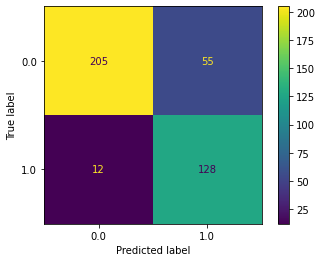

In [12]:
highQ = df_train[(df_train['label'] == 1)]
numLow = df_train[(df_train['label'] == 0)].shape[0]
randomSamples = highQ.sample(numLow - highQ.shape[0], random_state=4211)
df_new_train = df_train.append(randomSamples)

X_over = df_new_train.drop(columns=['label'])
y_over = df_new_train['label']

X_over = X_over.iloc[:,selected_cols]
X_over = StandardScaler().fit_transform(X_over)

grid_search.fit(X_over, y_over)

plot_confusion_matrix(grid_search, X_test, y_test)

y_pred = grid_search.predict(X_test)
score = sklearn.metrics.f1_score(y_test,y_pred)

print("Statistics after oversampling:")
print("Accuracy: %0.4f" % grid_search.score(X_test,y_test))
print("F1 Score: %0.4f" % score)